# **Experiment Notebook**



## Context


### 0. Import Packages

In [69]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [70]:
import pandas as pd
import numpy as np
import altair as alt
from collections import Counter
import matplotlib.pyplot as plt

### 1.   Load Dataset

In [71]:
file_url = 'https://drive.usercontent.google.com/download?id=1I9YA9aI-Cnc_IsGjyKfD_PldX5nVMmR6&export=download&authuser=0'

In [72]:
df = pd.read_csv(file_url)
df

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


### 2. Explore Dataset

In [73]:
df.shape

(131337, 17)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [75]:
df.duplicated().values.any()

False

In [76]:
df.nunique()

ID                           131337
Target                            2
age_band                          7
gender                            2
car_model                        19
car_segment                       4
age_of_vehicle_years             10
sched_serv_warr                  10
non_sched_serv_warr              10
sched_serv_paid                  10
non_sched_serv_paid              10
total_paid_services              10
total_services                   10
mth_since_last_serv              10
annualised_mileage               10
num_dealers_visited              10
num_serv_dealer_purchased        10
dtype: int64

### 3. Explore Target variable

In [77]:
target =  df['Target']

In [78]:
df_features = df.drop(['Target'], axis = 1)
df_features

,ID,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


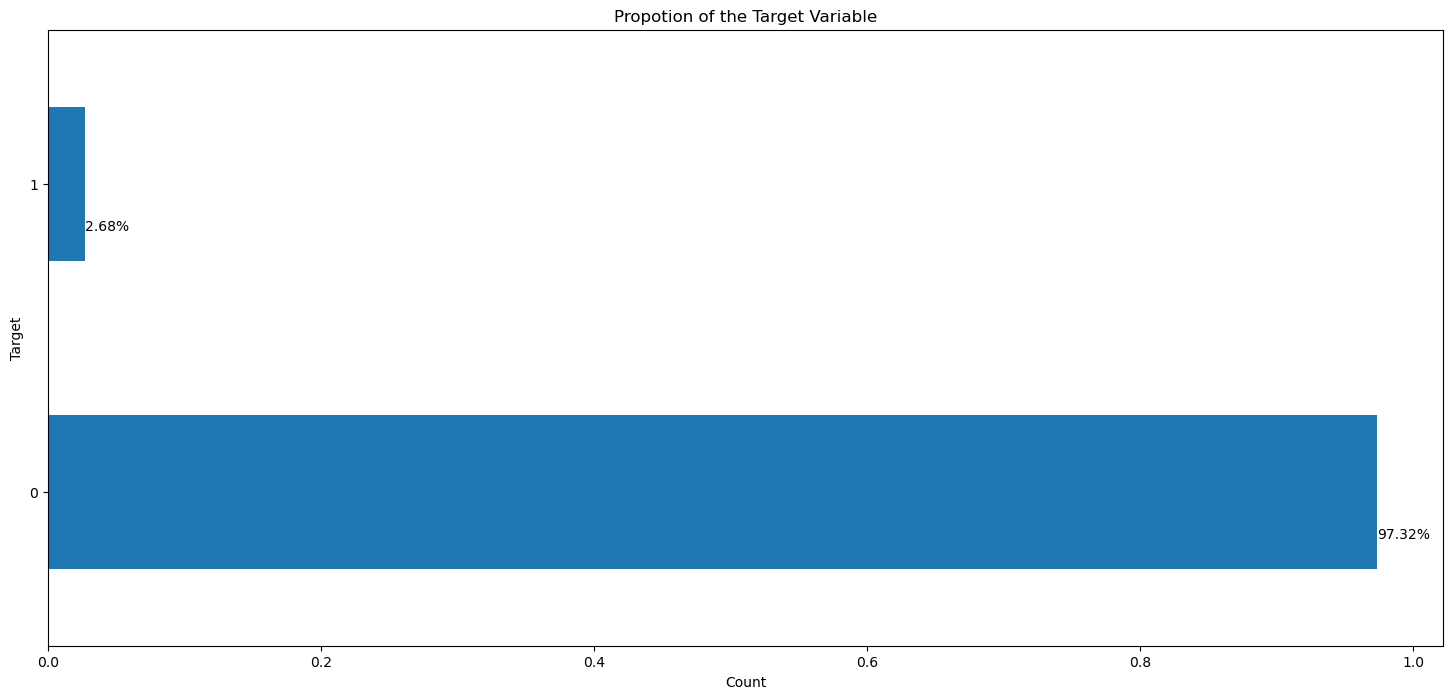

Target
0    97.31911
1     2.68089
Name: proportion, dtype: float64


Target
0    127816
1      3521
Name: count, dtype: int64

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18,8))
ax = df["Target"].value_counts(normalize=True).plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Target")
plt.title("Propotion of the Target Variable")

for p in ax.patches:
    percentage = '{:.2f}%'.format(p.get_width() * 100)
    ax.annotate(percentage, (p.get_x() + p.get_width(), p.get_y() + 0.1))

plt.show()

class_percentages = df["Target"].value_counts(normalize=True) * 100
print(class_percentages)

df["Target"].value_counts()

### 4. Data Exporation and Preparation

In [81]:
df['gender'].replace({'Female':0, 'Male':1}, inplace = True)

In [109]:
male_prob = df['gender'].value_counts(normalize=True)[1]
male_prob

0.5815344435667188

In [110]:
df['gender'] = df['gender'].apply(lambda x: np.random.choice([1, 0], p=[male_prob, 1-male_prob]) if pd.isnull(x) else x)

In [82]:
df = df.drop(['age_band'], axis = 1)

In [83]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
cat_cols

['car_model', 'car_segment']

In [84]:
df = pd.get_dummies(data = df, columns = ['car_segment'], dtype = int)
df.head()

,ID,Target,gender,car_model,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,1,0,1.0,model_1,9,2,10,3,7,5,6,9,8,10,4,1,0,0,0
1,2,0,NaN,model_2,6,10,3,10,4,9,10,6,10,7,10,0,0,0,1
2,3,0,1.0,model_3,9,10,9,10,9,10,10,7,10,6,10,0,1,0,0
3,5,0,NaN,model_3,5,8,5,8,4,5,6,4,10,9,7,0,1,0,0
4,6,0,0.0,model_2,8,9,4,10,7,9,8,5,4,4,9,0,0,0,1


In [98]:
frequency_encoding = df['car_model'].value_counts(normalize = True)
frequency_encoding

car_model
model_2     0.262614
model_5     0.187868
model_3     0.130001
model_1     0.116730
model_4     0.115390
model_7     0.062184
model_8     0.049057
model_10    0.024479
model_6     0.023383
model_9     0.007568
model_13    0.005436
model_12    0.004675
model_11    0.004660
model_15    0.002543
model_17    0.001165
model_16    0.000868
model_18    0.000769
model_14    0.000594
model_19    0.000015
Name: proportion, dtype: float64

In [99]:
df['car_model_freq'] = df['car_model'].map(frequency_encoding)
df[['car_model', 'car_model_freq']].head()

,car_model,car_model_freq
0,model_1,0.116730
1,model_2,0.262614
2,model_3,0.130001
3,model_3,0.130001
4,model_2,0.262614


In [113]:
num_cols = df.select_dtypes('number').columns.to_list()
num_cols

['ID',
 'Target',
 'gender',
 'age_of_vehicle_years',
 'sched_serv_warr',
 'non_sched_serv_warr',
 'sched_serv_paid',
 'non_sched_serv_paid',
 'total_paid_services',
 'total_services',
 'mth_since_last_serv',
 'annualised_mileage',
 'num_dealers_visited',
 'num_serv_dealer_purchased',
 'car_segment_LCV',
 'car_segment_Large/SUV',
 'car_segment_Other',
 'car_segment_Small/Medium',
 'car_model_freq']

In [114]:
df_cor_matrix = df[num_cols].corr()
df_cor_matrix

,ID,Target,gender,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium,car_model_freq
ID,1.000000,0.279716,0.003147,-0.034468,-0.051190,-0.023993,-0.051035,-0.012360,-0.027313,-0.046717,-0.039836,-0.022544,-0.013416,-0.016724,-0.000118,0.004839,-0.002728,-0.004594,-0.004306
Target,0.279716,1.000000,0.018376,-0.124091,-0.177424,-0.081328,-0.179040,-0.028396,-0.084429,-0.159905,-0.141695,-0.073055,-0.047244,-0.052618,0.010310,0.014811,-0.001245,-0.022815,-0.011897
gender,0.003147,0.018376,1.000000,-0.006391,0.002293,0.003935,0.005410,0.024398,0.025673,0.005458,-0.019233,0.011559,-0.000492,-0.010204,0.125799,0.043691,-0.004223,-0.142805,-0.081300
age_of_vehicle_years,-0.034468,-0.124091,-0.006391,1.000000,0.431484,0.427567,0.533914,0.330540,0.472669,0.505577,0.622472,0.432593,0.367122,0.318558,-0.055091,-0.053779,-0.018175,0.097789,0.061210
sched_serv_warr,-0.051190,-0.177424,0.002293,0.431484,1.000000,0.452472,0.862843,0.385451,0.647962,0.824917,0.274362,0.745811,0.400348,0.595877,-0.031230,0.001040,-0.025914,0.024801,0.082789
non_sched_serv_warr,-0.023993,-0.081328,0.003935,0.427567,0.452472,1.000000,0.461550,0.778126,0.711511,0.806163,0.328036,0.585439,0.460416,0.556104,0.007975,0.023439,-0.022775,-0.028614,0.056011
sched_serv_paid,-0.051035,-0.179040,0.005410,0.533914,0.862843,0.461550,1.000000,0.421448,0.734002,0.768570,0.340992,0.713790,0.421232,0.552438,-0.020923,0.005326,-0.025641,0.012372,0.080327
non_sched_serv_paid,-0.012360,-0.028396,0.024398,0.330540,0.385451,0.778126,0.421448,1.000000,0.858045,0.653475,0.291647,0.505798,0.418157,0.480041,0.107797,0.023235,-0.021254,-0.107517,0.017222
total_paid_services,-0.027313,-0.084429,0.025673,0.472669,0.647962,0.711511,0.734002,0.858045,1.000000,0.791230,0.337380,0.675939,0.470388,0.567864,0.101615,0.018134,-0.027546,-0.097289,0.034553
total_services,-0.046717,-0.159905,0.005458,0.505577,0.824917,0.806163,0.768570,0.653475,0.791230,1.000000,0.310909,0.783641,0.480503,0.668303,-0.013047,0.018664,-0.028275,-0.006994,0.082389


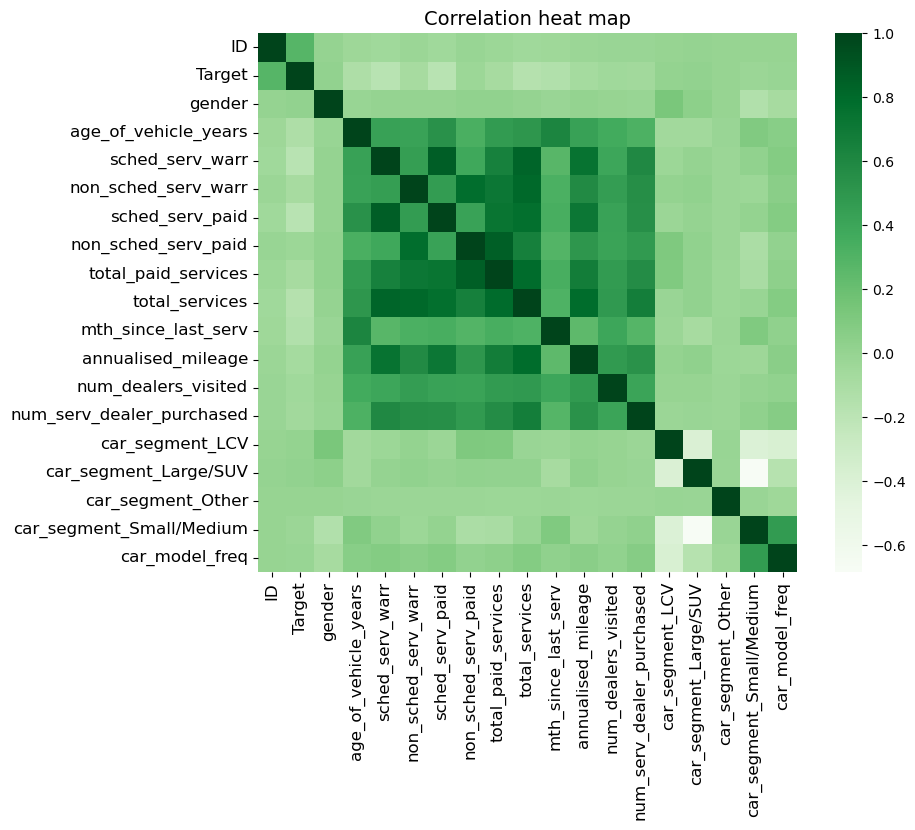

In [115]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
_ = sns.heatmap(df_cor_matrix, square=True, cmap='Greens')
_ = plt.title('Correlation heat map', fontsize=14)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)

<Axes: >

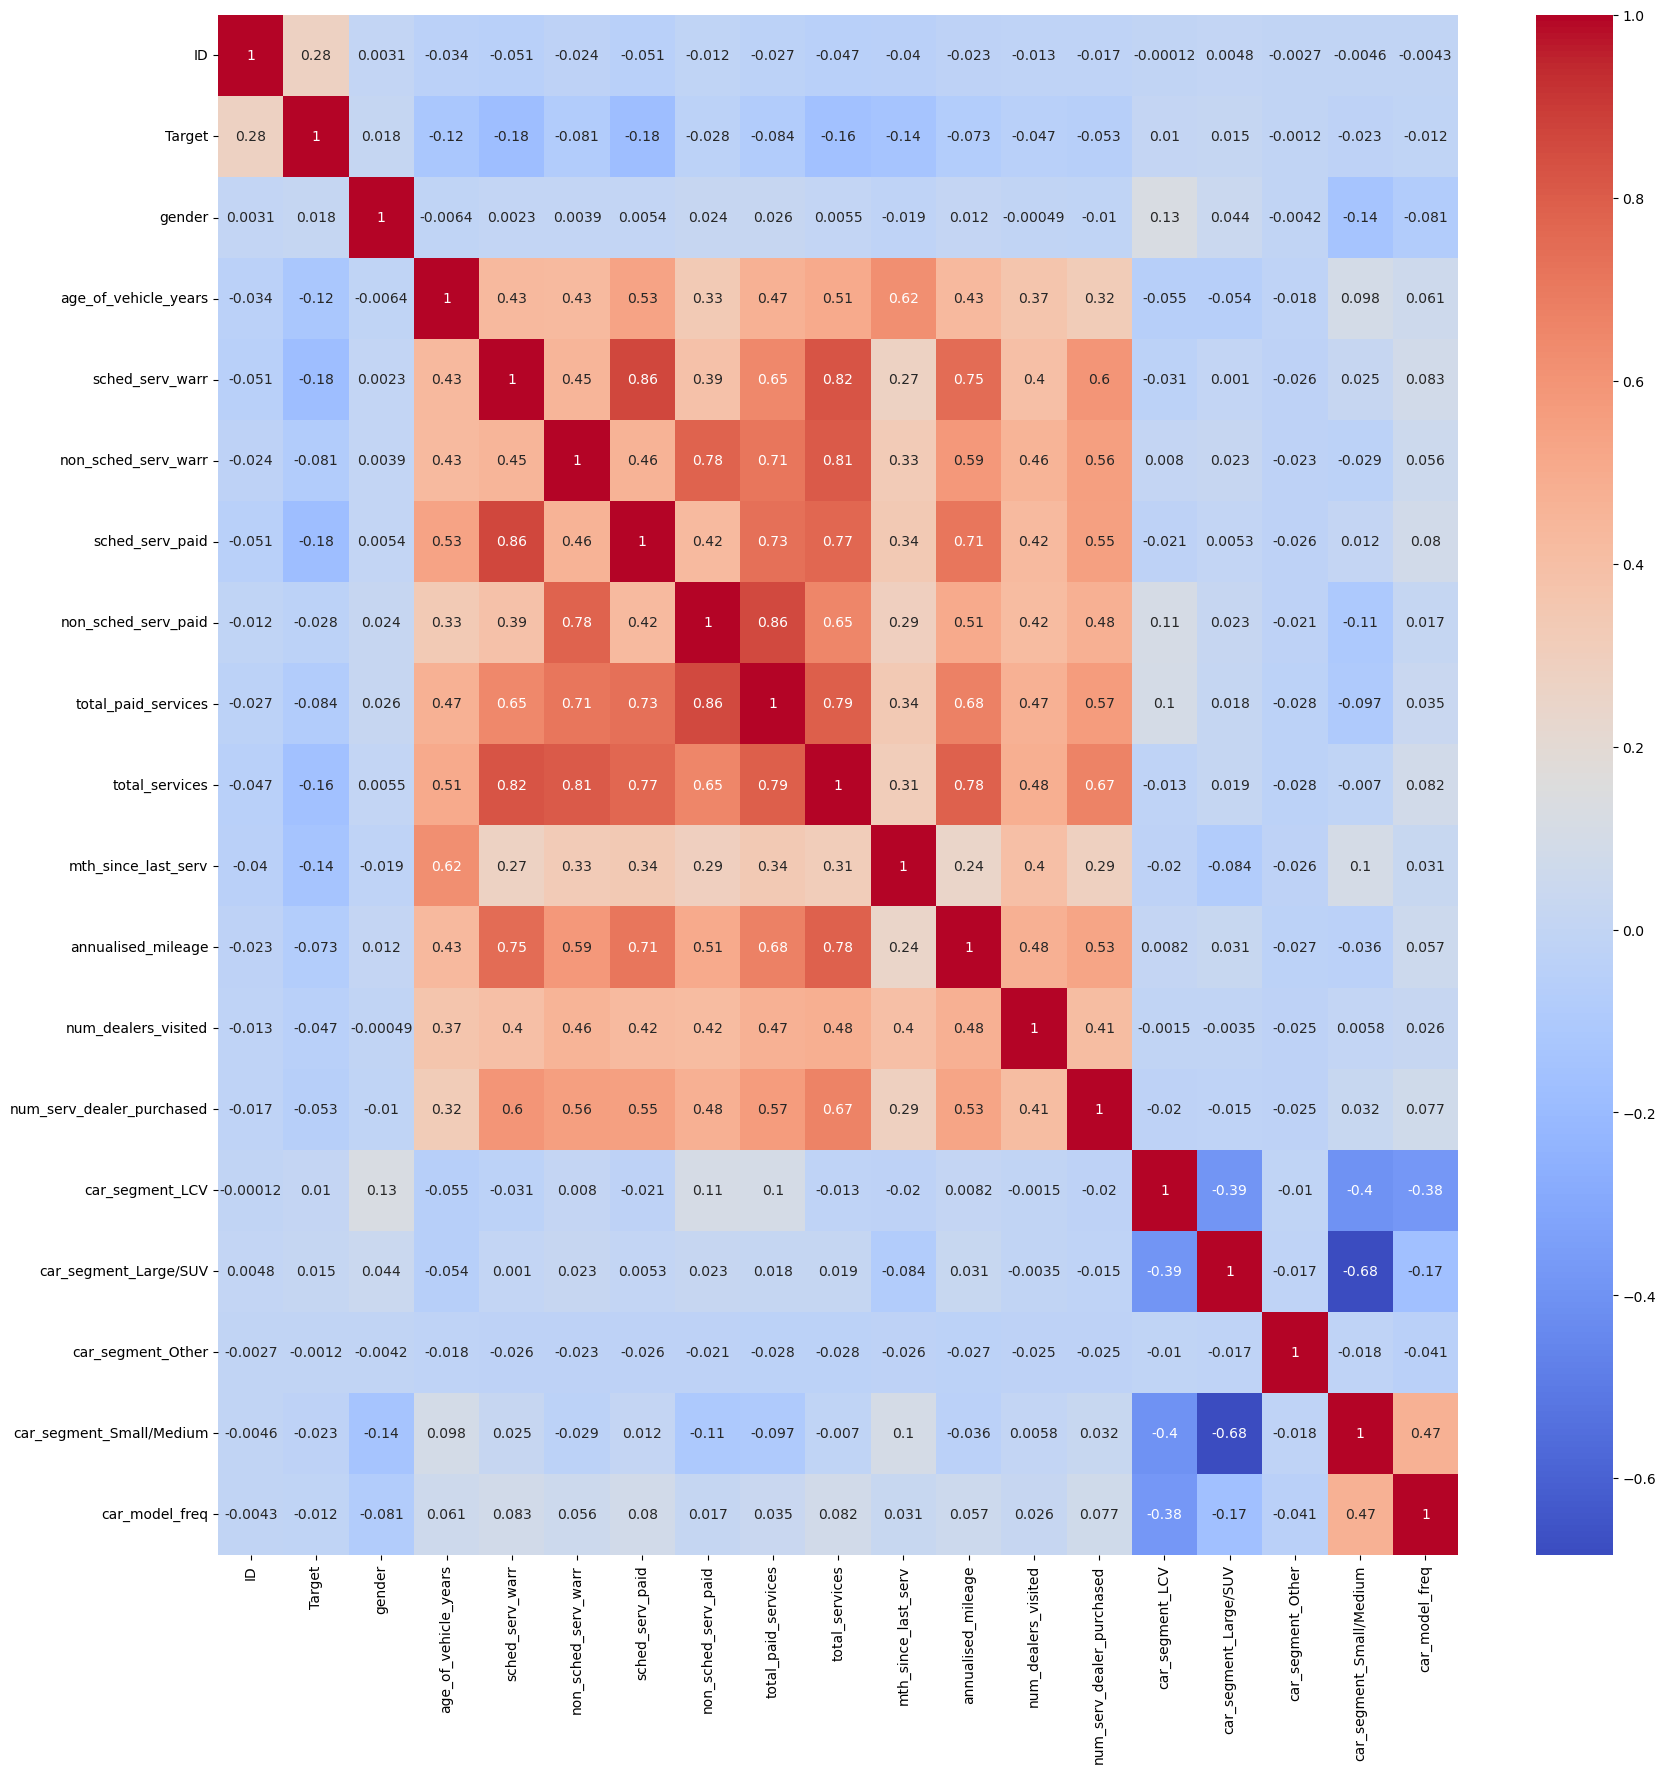

In [116]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cor_matrix, cmap = "coolwarm", annot=True)

In [117]:
cor_with_label = df_cor_matrix['Target']
cor_sorted = cor_with_label.sort_values(ascending=False)
cor_sorted

Target                       1.000000
ID                           0.279716
gender                       0.018376
car_segment_Large/SUV        0.014811
car_segment_LCV              0.010310
car_segment_Other           -0.001245
car_model_freq              -0.011897
car_segment_Small/Medium    -0.022815
non_sched_serv_paid         -0.028396
num_dealers_visited         -0.047244
num_serv_dealer_purchased   -0.052618
annualised_mileage          -0.073055
non_sched_serv_warr         -0.081328
total_paid_services         -0.084429
age_of_vehicle_years        -0.124091
mth_since_last_serv         -0.141695
total_services              -0.159905
sched_serv_warr             -0.177424
sched_serv_paid             -0.179040
Name: Target, dtype: float64

### 6. Split Dataset

In [ ]:
X_train =
X_val =
X_test =

y_train =
y_val =
y_test =

### 7. Baseline Model

In [ ]:
y_central =

In [ ]:
train_perf =
valid_perf =
test_perf =

### 8. Train Machine Learning Model

In [ ]:
model =

### 9. Assess Model Performance

In [ ]:
model_train_perf =
model_valid_perf =
model_test_perf =